/Users/yuxiqian/miniconda3/lib/python3.11/site-packages/sklearn/mixture/_base.py:268: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
/Users/yuxiqian/miniconda3/lib/python3.11/site-packages/sklearn/mixture/_base.py:268: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
/var/folders/p5/ghgfjt392_g8c_v_j7wntt840000gn/T/ipykernel_97488/1992016259.py:32: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/yuxiqian/miniconda3/lib/python3.11/site-packages/sklearn/mixture/_base.py:268: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
/var/folders/p5/ghgfjt392_g8c_v_j7wntt840000gn/T/ipykernel_97488/1992016259.py:32: UserWarning: The figure la

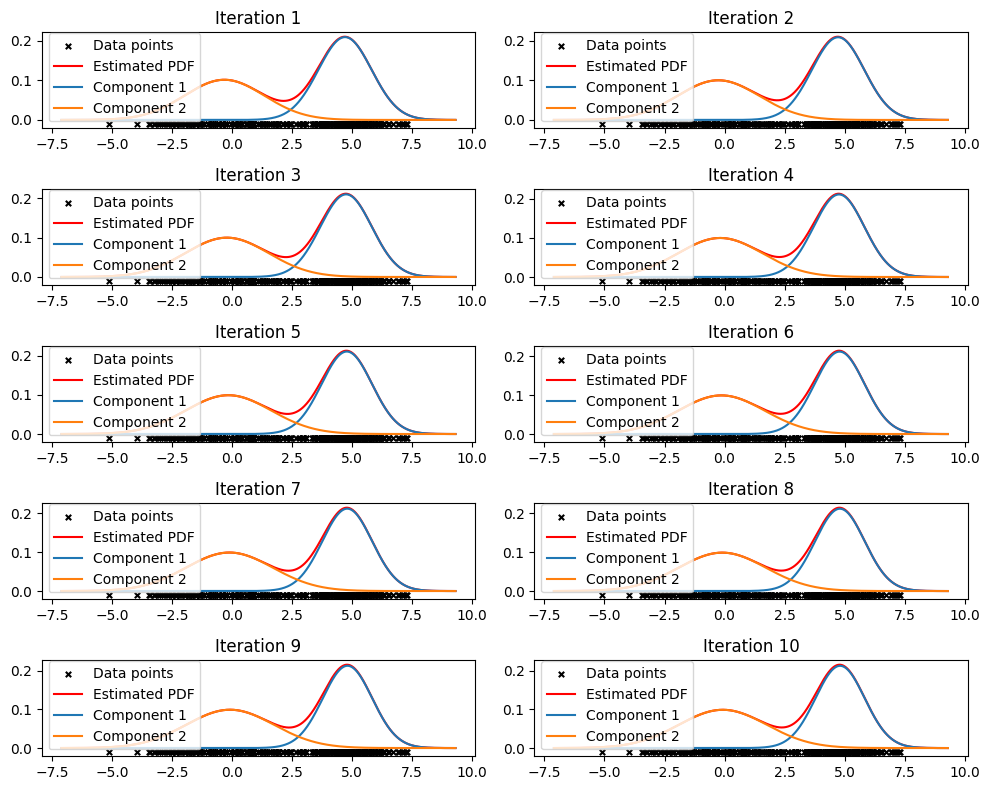

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Generating sample data
np.random.seed(0)
n_samples = 300
# Generate random samples from two different Gaussians
X = np.concatenate([np.random.normal(0, 2, int(0.5 * n_samples)),
                    np.random.normal(5, 1, int(0.5 * n_samples))]).reshape(-1, 1)

def plot_gmm_iterations(X, n_components=2, n_iterations=10):
    gmm = GaussianMixture(n_components=n_components, max_iter=1, warm_start=True, tol=1e-4)
    plt.figure(figsize=(10, 8))

    x = np.linspace(np.min(X)-2, np.max(X)+2, 1000).reshape(-1, 1)
    
    for i in range(n_iterations):
        gmm.fit(X)
        log_prob = gmm.score_samples(x)
        responsibilities = gmm.predict_proba(x)
        pdf = np.exp(log_prob)
        
        plt.subplot(n_iterations//2, 2, i+1)
        plt.scatter(X, np.zeros_like(X)-0.01, marker='x', color='k', s=15, label="Data points")
        plt.plot(x, pdf, color='red', label="Estimated PDF")
        for j in range(n_components):
            component_pdf = responsibilities[:, j] * pdf
            plt.plot(x, component_pdf, label=f"Component {j+1}")
        plt.title(f'Iteration {i+1}')
        plt.legend()
        plt.tight_layout()

    plt.show()

plot_gmm_iterations(X)
